 in this notebook we are going to learn the following :
 1. series 
 2. data frames
 3. how to indexing works
 4. reindex
 5. drop entries
 6. selecting values
 7. data alignment
 8. rand and sort
 9. summery statistics 
 10. missing data
 

lets get started =D

In [1]:
import numpy as np 
import pandas as pd

# 1. series 

In [2]:
# how to create pandas 
obj = pd.Series([1,2 ,3])
obj

0    1
1    2
2    3
dtype: int64

In [3]:
obj.values # to get the values of the series

array([1, 2, 3], dtype=int64)

In [4]:
# lets create a series with custom index
# note that you can type _ between numbers normally for the seek of you eyes so 10000000 -> 10_000_000
egypt_gov = pd.Series([25_000_000 , 15_000_000 , 5_000_000] , index = ['cairo' , 'alex' , 'sohag'])

In [5]:
egypt_gov

cairo    25000000
alex     15000000
sohag     5000000
dtype: int64

In [6]:
egypt_gov['sohag']

5000000

In [7]:
#get countries with population more tdhan 10 milion
egypt_gov[egypt_gov > 10_000_000] 

cairo    25000000
alex     15000000
dtype: int64

In [8]:
#check if this index exisits
'cairo' in egypt_gov

True

In [9]:
# how to turn this series into dictionary
egypt_gov_dict = egypt_gov.to_dict()
egypt_gov_dict

{'cairo': 25000000, 'alex': 15000000, 'sohag': 5000000}

In [10]:
# how to turn a dictionary into a series =D
egypt_gov_series =pd.Series( egypt_gov_dict)
egypt_gov_series

cairo    25000000
alex     15000000
sohag     5000000
dtype: int64

In [11]:
#but what would happen if we make an index of count greater than data 
gov_list = ['cairo','alex' , 'sohag' , 'luxor' , 'aswan']

In [12]:
obj2 = pd.Series(egypt_gov_dict , index = gov_list)

In [13]:
obj2 #excetra values will be null

cairo    25000000.0
alex     15000000.0
sohag     5000000.0
luxor           NaN
aswan           NaN
dtype: float64

In [14]:
#check the null values
pd.isnull(obj2)

cairo    False
alex     False
sohag    False
luxor     True
aswan     True
dtype: bool

In [15]:
#this to get how many null values you have in your series
pd.isnull(obj2).sum()

2

# 2. data frames


In [20]:
# go to the following link en.wikipedia.org/wiki/Shabab_Al_Ahli_Club
#and select from the table some rows  then copy
#you gonna make some thing amazing =D
df = pd.read_clipboard()

In [21]:
df

,No,Position,Player,Nation
0,1,GK,Jamal Al Hosani,United Arab Emirates
1,2,DF,Salmeen Khamis,United Arab Emirates
2,3,MF,Carlos Eduardo,Brazil
3,4,DF,Mohammed Marzooq,United Arab Emirates
4,5,DF,Walid Abbas,United Arab Emirates
5,7,MF,Jaloliddin Masharipov (on loan from Al-Nassr),Uzbekistan
6,8,MF,Waleed Hussain,United Arab Emirates


In [22]:
#how to get the columns 
df.columns

Index(['No', 'Position', 'Player', 'Nation'], dtype='object')

In [23]:
df['Position']

0    GK
1    DF
2    MF
3    DF
4    DF
5    MF
6    MF
Name: Position, dtype: object

In [24]:
# also you can use
df.Position # but note this wont work for columns of multiple words spaced

0    GK
1    DF
2    MF
3    DF
4    DF
5    MF
6    MF
Name: Position, dtype: object

In [25]:
# how to create a data frame with some wanted columns 
new_df = pd.DataFrame(df , columns = ['No' , 'Position','Player' ])

In [26]:
new_df

,No,Position,Player
0,1,GK,Jamal Al Hosani
1,2,DF,Salmeen Khamis
2,3,MF,Carlos Eduardo
3,4,DF,Mohammed Marzooq
4,5,DF,Walid Abbas
5,7,MF,Jaloliddin Masharipov (on loan from Al-Nassr)
6,8,MF,Waleed Hussain


In [27]:
# use head and tail to take a look to data frame
df.head() # try df.head(3)

,No,Position,Player,Nation
0,1,GK,Jamal Al Hosani,United Arab Emirates
1,2,DF,Salmeen Khamis,United Arab Emirates
2,3,MF,Carlos Eduardo,Brazil
3,4,DF,Mohammed Marzooq,United Arab Emirates
4,5,DF,Walid Abbas,United Arab Emirates


In [28]:
df.tail() # also try df.tail(2)

,No,Position,Player,Nation
2,3,MF,Carlos Eduardo,Brazil
3,4,DF,Mohammed Marzooq,United Arab Emirates
4,5,DF,Walid Abbas,United Arab Emirates
5,7,MF,Jaloliddin Masharipov (on loan from Al-Nassr),Uzbekistan
6,8,MF,Waleed Hussain,United Arab Emirates


In [29]:
df.iloc[5] # to select a specific row - index

No                                                      7
Position                                               MF
Player      Jaloliddin Masharipov (on loan from Al-Nassr)
Nation                                         Uzbekistan
Name: 5, dtype: object

In [30]:
# how to add a new column
df['extra col'] = 'additional info'
df

,No,Position,Player,Nation,extra col
0,1,GK,Jamal Al Hosani,United Arab Emirates,additional info
1,2,DF,Salmeen Khamis,United Arab Emirates,additional info
2,3,MF,Carlos Eduardo,Brazil,additional info
3,4,DF,Mohammed Marzooq,United Arab Emirates,additional info
4,5,DF,Walid Abbas,United Arab Emirates,additional info
5,7,MF,Jaloliddin Masharipov (on loan from Al-Nassr),Uzbekistan,additional info
6,8,MF,Waleed Hussain,United Arab Emirates,additional info


In [31]:
df['extra col']  = np.arange(len(df.No)) # you should be fimiliar with len(..) =D
df

,No,Position,Player,Nation,extra col
0,1,GK,Jamal Al Hosani,United Arab Emirates,0
1,2,DF,Salmeen Khamis,United Arab Emirates,1
2,3,MF,Carlos Eduardo,Brazil,2
3,4,DF,Mohammed Marzooq,United Arab Emirates,3
4,5,DF,Walid Abbas,United Arab Emirates,4
5,7,MF,Jaloliddin Masharipov (on loan from Al-Nassr),Uzbekistan,5
6,8,MF,Waleed Hussain,United Arab Emirates,6


In [32]:
# fill the extra col with a custom create series 
stadiums = pd.Series(['Mhassan' , 'NHassan_s'] , index = [4 , 0])
stadiums

4      Mhassan
0    NHassan_s
dtype: object

In [33]:
df['extra col'] = stadiums # we gonna fill the exra col with the series we created 
df

,No,Position,Player,Nation,extra col
0,1,GK,Jamal Al Hosani,United Arab Emirates,NHassan_s
1,2,DF,Salmeen Khamis,United Arab Emirates,NaN
2,3,MF,Carlos Eduardo,Brazil,NaN
3,4,DF,Mohammed Marzooq,United Arab Emirates,NaN
4,5,DF,Walid Abbas,United Arab Emirates,Mhassan
5,7,MF,Jaloliddin Masharipov (on loan from Al-Nassr),Uzbekistan,NaN
6,8,MF,Waleed Hussain,United Arab Emirates,NaN


In [34]:
# hwo to drop a column in df
del df['extra col']

In [35]:
df

,No,Position,Player,Nation
0,1,GK,Jamal Al Hosani,United Arab Emirates
1,2,DF,Salmeen Khamis,United Arab Emirates
2,3,MF,Carlos Eduardo,Brazil
3,4,DF,Mohammed Marzooq,United Arab Emirates
4,5,DF,Walid Abbas,United Arab Emirates
5,7,MF,Jaloliddin Masharipov (on loan from Al-Nassr),Uzbekistan
6,8,MF,Waleed Hussain,United Arab Emirates


#  3. how to indexing works


In [36]:
my_ser = pd.Series([1,2,3,4] , index = ['a' , 'b' , 'c','d'])
my_ser

a    1
b    2
c    3
d    4
dtype: int64

In [37]:
my_index = my_ser.index
my_index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [38]:
# you can just make selection just as if it was a normal numpy array
my_index[2]

'c'

In [39]:
my_index[:2]

Index(['a', 'b'], dtype='object')

In [40]:
# but note you can not update it it works like a tuple
my_index[0] = 'E' # you gonna get an error raised in your face 

TypeError: Index does not support mutable operations

#  4. reindex


In [41]:
my_ser

a    1
b    2
c    3
d    4
dtype: int64

In [42]:
my_ser.reindex(['a' , 'b' , 'c' , 'd' , 'e' , 'f'])

a    1.0
b    2.0
c    3.0
d    4.0
e    NaN
f    NaN
dtype: float64

In [43]:
# note that you gonna get nan values if you did not specify the correct index values of the original series
my_ser

a    1
b    2
c    3
d    4
dtype: int64

In [44]:
# how to make a default value of the new indeces that not exist in the original my_ser
my_ser.reindex(['a' , 'b' , 'c' , 'd' , 'e' , 'f'] , fill_value = 0) 

a    1
b    2
c    3
d    4
e    0
f    0
dtype: int64

In [45]:
ser_3 = pd.Series(['Egypt' , 'Kuwait' , 'Palestine'] , index = [0 ,  5 , 10])
ser_3

0         Egypt
5        Kuwait
10    Palestine
dtype: object

In [46]:
ser_4 = ser_3.reindex(range(15) , method = 'ffill') # note the values -> ffill means forward fill =D
ser_4

0         Egypt
1         Egypt
2         Egypt
3         Egypt
4         Egypt
5        Kuwait
6        Kuwait
7        Kuwait
8        Kuwait
9        Kuwait
10    Palestine
11    Palestine
12    Palestine
13    Palestine
14    Palestine
dtype: object

In [47]:
# lets go to see how dataframe works regarding to reindexing

In [48]:
df = pd.DataFrame(np.random.randn(25).reshape((5 , 5 )) , index = ['a' , 'b' , 'd' , 'e' , 'f'] , 
                 columns = ['col1' , 'col2' , 'col3' , 'col4' , 'col5'])
df

,col1,col2,col3,col4,col5
a,-0.456985,1.204145,1.515744,-0.943357,0.518768
b,0.944919,-2.027649,0.757717,-0.818716,-1.237241
d,-0.634613,1.899062,0.154209,-1.964553,0.351396
e,0.630950,0.187925,1.651749,-0.082621,0.584505
f,1.264956,-1.794821,-1.019900,1.241210,-0.994029


In [49]:
#lets reindex
df_2 = df.reindex(['a' , 'b' , 'c',  'd' , 'e' , 'f'])
df_2

,col1,col2,col3,col4,col5
a,-0.456985,1.204145,1.515744,-0.943357,0.518768
b,0.944919,-2.027649,0.757717,-0.818716,-1.237241
c,NaN,NaN,NaN,NaN,NaN
d,-0.634613,1.899062,0.154209,-1.964553,0.351396
e,0.630950,0.187925,1.651749,-0.082621,0.584505
f,1.264956,-1.794821,-1.019900,1.241210,-0.994029


In [50]:
#lets add columns
df_2.reindex(columns =  ['col1' , 'col2' , 'col3' , 'col4' , 'col5' , 'col6'])

,col1,col2,col3,col4,col5,col6
a,-0.456985,1.204145,1.515744,-0.943357,0.518768,NaN
b,0.944919,-2.027649,0.757717,-0.818716,-1.237241,NaN
c,NaN,NaN,NaN,NaN,NaN,NaN
d,-0.634613,1.899062,0.154209,-1.964553,0.351396,NaN
e,0.630950,0.187925,1.651749,-0.082621,0.584505,NaN
f,1.264956,-1.794821,-1.019900,1.241210,-0.994029,NaN


In [51]:
df_2.iloc[1:3]

,col1,col2,col3,col4,col5
b,0.944919,-2.027649,0.757717,-0.818716,-1.237241
c,NaN,NaN,NaN,NaN,NaN


#  5. drop entries


In [52]:
ser1 = pd.Series(np.arange(3) , index = ['a' , 'b' , 'c'])
ser1

a    0
b    1
c    2
dtype: int32

In [53]:
ser1.drop('b')

a    0
c    2
dtype: int32

In [54]:
df

,col1,col2,col3,col4,col5
a,-0.456985,1.204145,1.515744,-0.943357,0.518768
b,0.944919,-2.027649,0.757717,-0.818716,-1.237241
d,-0.634613,1.899062,0.154209,-1.964553,0.351396
e,0.630950,0.187925,1.651749,-0.082621,0.584505
f,1.264956,-1.794821,-1.019900,1.241210,-0.994029


In [55]:
df.drop('e')

,col1,col2,col3,col4,col5
a,-0.456985,1.204145,1.515744,-0.943357,0.518768
b,0.944919,-2.027649,0.757717,-0.818716,-1.237241
d,-0.634613,1.899062,0.154209,-1.964553,0.351396
f,1.264956,-1.794821,-1.019900,1.241210,-0.994029


In [56]:
# but what if I want to drop one of the columns 
df.drop('col2' , axis = 1)

,col1,col3,col4,col5
a,-0.456985,1.515744,-0.943357,0.518768
b,0.944919,0.757717,-0.818716,-1.237241
d,-0.634613,0.154209,-1.964553,0.351396
e,0.630950,1.651749,-0.082621,0.584505
f,1.264956,-1.019900,1.241210,-0.994029


 #  6. selecting values


In [57]:
ser1

a    0
b    1
c    2
dtype: int32

In [58]:
ser1['a']

0

In [59]:
ser1[1:3] # select from second to the third 

b    1
c    2
dtype: int32

In [60]:
ser1[['a' , 'b']] # slect a and b 

a    0
b    1
dtype: int32

In [61]:
ser1[ser1 >1] # select values where they are greater than 1

c    2
dtype: int32

In [62]:
ser1[ser1 == 0 ] = 50 # asign the a new value of indeces where the elemet equal = 0
ser1

a    50
b     1
c     2
dtype: int32

In [63]:
# lets see how data frames works
df

,col1,col2,col3,col4,col5
a,-0.456985,1.204145,1.515744,-0.943357,0.518768
b,0.944919,-2.027649,0.757717,-0.818716,-1.237241
d,-0.634613,1.899062,0.154209,-1.964553,0.351396
e,0.630950,0.187925,1.651749,-0.082621,0.584505
f,1.264956,-1.794821,-1.019900,1.241210,-0.994029


In [64]:
df[df['col1'] > 0] # select entries where col1 > 0 -> positive natural number =D  

,col1,col2,col3,col4,col5
b,0.944919,-2.027649,0.757717,-0.818716,-1.237241
e,0.630950,0.187925,1.651749,-0.082621,0.584505
f,1.264956,-1.794821,-1.019900,1.241210,-0.994029


In [65]:
# get a boolean data frame
df>0

,col1,col2,col3,col4,col5
a,False,True,True,False,True
b,True,False,True,False,False
d,False,True,True,False,True
e,True,True,True,False,True
f,True,False,False,True,False


In [66]:
# select a specific row 
df.iloc[0] #also df.loc['a']
# please avoid using df.ix

col1   -0.456985
col2    1.204145
col3    1.515744
col4   -0.943357
col5    0.518768
Name: a, dtype: float64

#  7. data alignment


In [67]:
ser1

a    50
b     1
c     2
dtype: int32

In [68]:
ser2 = pd.Series([3 , 4 , 5 , 6] , index = ['a' , 'b' , 'c' , 'd'])
ser2

a    3
b    4
c    5
d    6
dtype: int64

In [69]:
ser1 + ser2

a    53.0
b     5.0
c     7.0
d     NaN
dtype: float64

In [70]:
df1 = pd.DataFrame(np.arange(4).reshape((2,2)),columns = list('AB') , index = ['shg' , 'alex'])
df1

,A,B
shg,0,1
alex,2,3


In [71]:
df2 = pd.DataFrame(np.arange(9).reshape((3,3)),columns = list('ABC') , index = ['shg' , 'alex' , 'ASW'])
df2

,A,B,C
shg,0,1,2
alex,3,4,5
ASW,6,7,8


In [72]:
df1+df2 #note that the result will only contain the values where they both exist in the original dataframe

,A,B,C
ASW,NaN,NaN,NaN
alex,5.0,7.0,NaN
shg,0.0,2.0,NaN


In [73]:
# but what if I want to make the counterpart equal zero if does exist in any of them and not exist in the other dataframe
df1.add(df2 , fill_value = 0)

,A,B,C
ASW,6.0,7.0,8.0
alex,5.0,7.0,5.0
shg,0.0,2.0,2.0


In [74]:
#Note -> that for the previous code it will generate a  nan value if one if the value is nan and only exist in one datframe 

In [75]:
df2

,A,B,C
shg,0,1,2
alex,3,4,5
ASW,6,7,8


In [76]:
# imageine if we have a series and we want to make a substraction to it 
ser1 = pd.Series([9 , 10 , 11] , index =list('ABC'))
ser1

A     9
B    10
C    11
dtype: int64

In [77]:
df2-ser1

,A,B,C
shg,-9,-9,-9
alex,-6,-6,-6
ASW,-3,-3,-3


# 8. rand and sort

In [78]:
ser = pd.Series(np.random.randn(10) , index = list('adbidgqtpo'))
ser

a    0.634340
d   -1.770365
b   -0.047671
i   -0.921696
d    1.203996
g    0.067977
q   -1.552692
t    0.269030
p    0.095631
o   -1.635758
dtype: float64

In [79]:
# how to sort based on indeces
ser.sort_index() 

a    0.634340
b   -0.047671
d   -1.770365
d    1.203996
g    0.067977
i   -0.921696
o   -1.635758
p    0.095631
q   -1.552692
t    0.269030
dtype: float64

In [80]:
# how to sort based on values
ser.sort_values()

d   -1.770365
o   -1.635758
q   -1.552692
i   -0.921696
b   -0.047671
g    0.067977
p    0.095631
t    0.269030
a    0.634340
d    1.203996
dtype: float64

In [81]:
ser.rank() # give me the ranking of each element if it was sorted =D

a     9.0
d     1.0
b     5.0
i     4.0
d    10.0
g     6.0
q     3.0
t     8.0
p     7.0
o     2.0
dtype: float64

#  9. summery statistics 


In [82]:
arr = np.array([[1 , 2 , np.nan] , [np.nan, 3 ,4]])
df_1 = pd.DataFrame(arr , index = ['A' , 'B'] , columns = ['One' , 'Two' , 'Three'])
df_1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [83]:
# get the indeces of  max vlaues of ech column 
df_1.idxmax() # similarly you can get the min -> df.idxmin()
# note also that nan is not considerd as a value to be compared as min or max

One      A
Two      B
Three    B
dtype: object

In [84]:
df_1.cumsum() #accomulation sum

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [85]:
# get a lot of stats terms like mean max mean standard deveiation .. etc
df_1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [103]:
# next lets pull some stocks data to play with a little bit

my_df = pd.DataFrame(data = np.random.randn(5*50).reshape((50,5)) , columns = 'col1 , col2 , col3 , col4 , col5'.split(' , '))

In [104]:
my_df

,col1,col2,col3,col4,col5
0,1.071365,-0.710410,-2.399594,2.765713,0.950605
1,-0.634482,0.042257,0.264625,-0.335505,0.690236
2,0.769665,-0.981035,-1.217699,-0.579755,-1.484574
3,-0.790751,2.611705,0.447450,0.880651,-0.495193
4,0.500786,-0.034341,1.210983,0.873891,0.361054
5,-0.989025,-0.154163,-0.248136,0.079863,0.786367
6,0.439346,-0.932047,1.084086,-0.163142,0.224434
7,2.264769,1.099200,-0.679740,-0.241248,-1.260918
8,-1.441639,-0.602343,0.673045,-0.040244,0.328849
9,-1.492405,-0.789828,-1.150261,-0.346319,0.987354


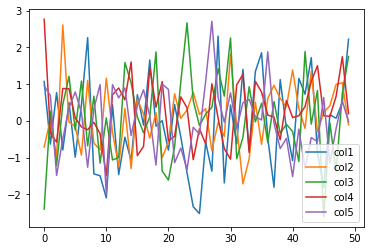

In [105]:
my_df.plot()

In [111]:
#lets test the correlation -> bleive me this an important concept once you get to linear regression
my_df.corr()

,col1,col2,col3,col4,col5
col1,1.000000,-0.006516,0.027244,0.270190,-0.052378
col2,-0.006516,1.000000,0.140455,-0.238466,-0.322243
col3,0.027244,0.140455,1.000000,-0.113076,-0.182988
col4,0.270190,-0.238466,-0.113076,1.000000,0.165177
col5,-0.052378,-0.322243,-0.182988,0.165177,1.000000


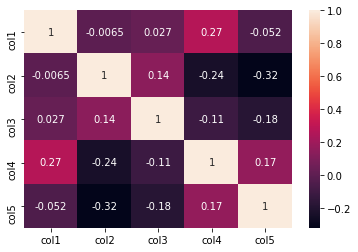

In [112]:
# how by just a look you can detect which features are correlated with each other
import seaborn as sns
sns.heatmap(my_df.corr() , annot = True)

In [114]:
ser1

A     9
B    10
C    11
dtype: int64

In [115]:
ser1.unique() # to get the unique values of series or col within a dataframe

array([ 9, 10, 11], dtype=int64)

In [118]:
ser1.value_counts() # to get the counts of this values if it was repeated 
# 9 is only exist one time , 10 also 11 the same

11    1
10    1
9     1
dtype: int64

#  10. missing data


In [121]:
data = pd.Series(['one' , 'two' , np.nan ,  'four'])
data

0     one
1     two
2     NaN
3    four
dtype: object

In [124]:
# boolean series represents the null values
data.isnull() 

0    False
1    False
2     True
3    False
dtype: bool

In [125]:
# drop the null values from the series
data.dropna()

0     one
1     two
3    four
dtype: object

In [130]:
dframe = pd.DataFrame([[1 , 2 , 3 ] , [np.nan , 5 , 6] , [7 , np.nan , 9 ] , [np.nan , np.nan , np.nan]])
dframe

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


In [132]:
clean_df = dframe.dropna()
clean_df

,0,1,2
0,1.0,2.0,3.0


In [134]:
#drop if all values are null
dframe.dropna(how = 'all')

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


In [138]:
# dorp rows that has atlease two values
dframe.dropna(thresh = 2)

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


In [140]:
dframe.dropna(thresh = 1)

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


In [142]:
# fill all na with 1 
dframe.fillna(1)

,0,1,2
0,1.0,2.0,3.0
1,1.0,5.0,6.0
2,7.0,1.0,9.0
3,1.0,1.0,1.0


In [145]:
# fill each column with its counter part form a dictionary
dframe.fillna({0 : 0 ,2 :2 , 3:3})

,0,1,2
0,1.0,2.0,3.0
1,0.0,5.0,6.0
2,7.0,NaN,9.0
3,0.0,NaN,2.0
